# B1. Code:

### Import Libraries

In [1]:
#Import NumPy and Pandas Libraries
import numpy as np
import pandas as pd
from pandas import DataFrame

#Visual Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# inline displays plot actions below the code

#Statistics libraries
import pylab
import statsmodels.api as sm
import statistics
from scipy import stats

#Import chisquare from SciPy
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

### Import cleaned dataset into Pandas DataFrame

In [2]:
df = pd.read_csv('/Users/Richard/OneDrive - Western Governors University/MSDA/D207/Databases/churn/churn_clean.csv')

### Change the names of Customer Survey features for clarity

In [3]:
df.rename(columns = {'Item1':'TimelyResponse',
                    'Item2':'TimelyFixes',
                     'Item3':'Replacement',
                     'Item4':'Reliability',
                     'Item5':'Options',
                     'Item6':'Respectful',
                     'Item7':'Courteous',
                     'Item8':'Listening'},
         inplace=True)

### Cross tabulation of Churn & TimelyResponse

In [4]:
contingency = pd.crosstab(df['Churn'], df['TimelyResponse'])
contingency

TimelyResponse,1,2,3,4,5,6,7
Churn,,,,,,,
No,158,1002,2562,2473,994,146,15
Yes,66,391,886,885,365,53,4


### Cross Tabulation of Churn & TimelyResponse

In [5]:
contingency_pct = pd.crosstab(df['Churn'], df['TimelyResponse'],
                             normalize='index')
contingency_pct

TimelyResponse,1,2,3,4,5,6,7
Churn,,,,,,,
No,0.021497,0.136327,0.348571,0.336463,0.135238,0.019864,0.002041
Yes,0.024906,0.147547,0.334340,0.333962,0.137736,0.020000,0.001509


### Heatmap of Contingency (Churn & TimelyResponse)

<AxesSubplot:xlabel='TimelyResponse', ylabel='Churn'>

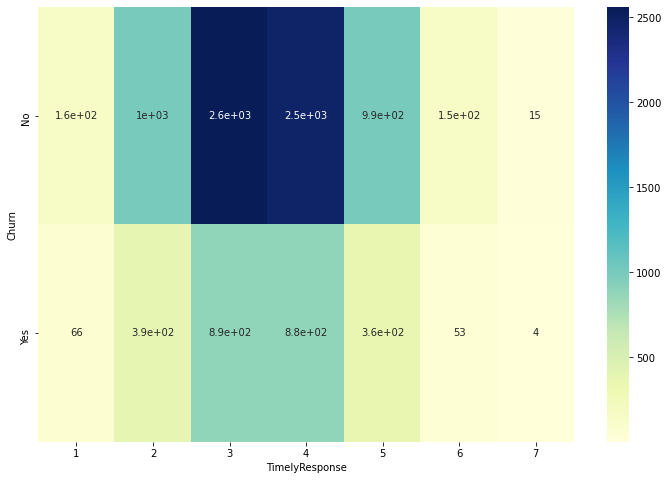

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

###  

# B2. Output

### Independence test calculating Chi-square 

In [7]:
c, p, dof, expected = chi2_contingency(contingency)
print('P-Value : ' + str(p))

P-Value : 0.6318335816054494


### C. Univariate Statistics

In [8]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,Replacement,Reliability,Options,Respectful,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


### C1. Visual of Findings

### Histogram of Continuous & Categorical Variables

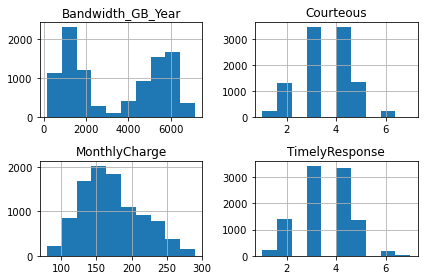

In [9]:
df[['Bandwidth_GB_Year', 'Courteous', 'MonthlyCharge', 'TimelyResponse']].hist()
plt.savefig('churn_histogram.jpg')
plt.tight_layout()

### Seaborn Boxplots of Continuous & Categorical Variables

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


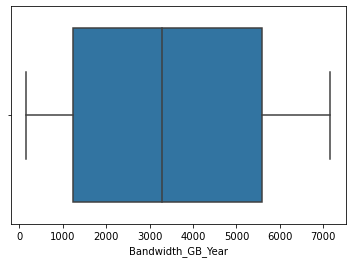

In [10]:
sns.boxplot('Bandwidth_GB_Year', data = df)
plt.show()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


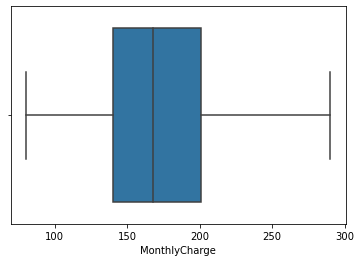

In [11]:
sns.boxplot('MonthlyCharge', data = df)
plt.show()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


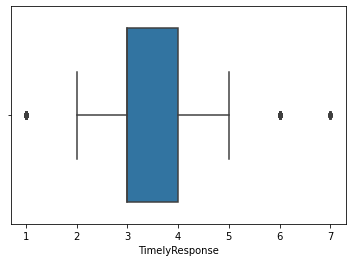

In [12]:
sns.boxplot('TimelyResponse', data = df)
plt.show()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


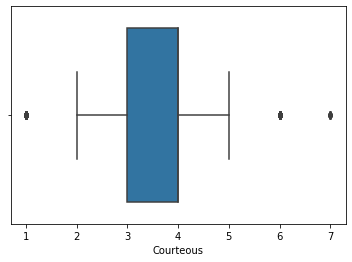

In [13]:
sns.boxplot('Courteous', data = df)
plt.show()

###  

# D. Bivariate Statistics

### Heatmap: Bivariate Analysis of Correlation

In [14]:
churn_bivariate = df[['Bandwidth_GB_Year', 'Courteous', 'MonthlyCharge', 'TimelyResponse']]

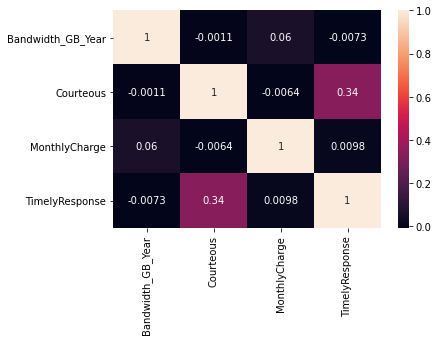

In [15]:
sns.heatmap(churn_bivariate.corr(), annot=True)
plt.show()

### Scatter Plot describing MonthlyCharge & Bandwidth variables

<AxesSubplot:xlabel='MonthlyCharge', ylabel='Bandwidth_GB_Year'>

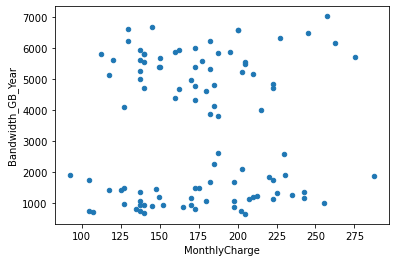

In [16]:
churn_bivariate[churn_bivariate['MonthlyCharge'] < 300].sample(100).plot.scatter(x='MonthlyCharge', y='Bandwidth_GB_Year')

### Scatter Plot of describing TimelyResponse & Courteous variables

<AxesSubplot:xlabel='TimelyResponse', ylabel='Courteous'>

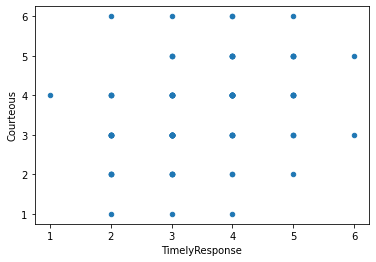

In [17]:
churn_bivariate[churn_bivariate['TimelyResponse'] < 7].sample(100).plot.scatter(x='TimelyResponse', y='Courteous')